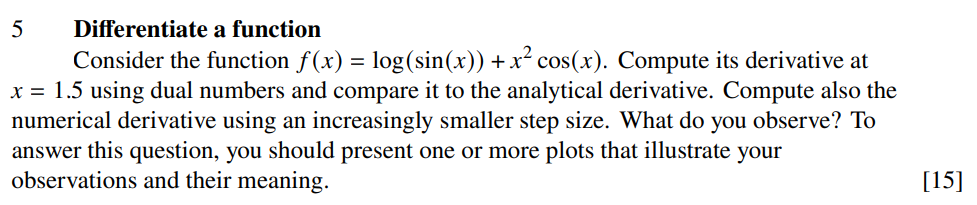

$f(x) = \log(\sin(x)) + x^{2}\cos(x)$.

Then via the chain rule

$f'(x) = \frac{1}{\sin(x)}\cos(x) + 2x\cos(x) -x^{2}sin(x)$

$f'(x) = \frac{\cos(x)}{\sin(x)} + 2x\cos(x) -x^{2}sin(x)$


$f'(1.5) = \frac{\cos(1.5)}{\sin(1.5)} + 2(1.5)\cos(1.5) -(1.5)^{2}\sin(1.5)$


In [25]:
# imports
import numpy as np
from dual_autodiff.dual import Dual
import math

def function(x):
    """
    evaluates the function given in question 5 at some point x 

    """
    return np.log(np.sin(x)) + x**2 * np.cos(x)

def function_deriv(x):
    """
    evaluates the derivitive of the function given in question 5 at some point x 

    """
    return np.cos(x)/np.sin(x) + 2*x*np.cos(x) - x**2 * np.sin(x)




In [4]:
analytical_func = function(1.5)
analytical_deriv =  function_deriv(1.5)

print("The function evaluated at x=1.5 is {} to floating point precision".format(analytical_func))
print("The analytical derivitive of the function evaluated at x=1.5 is {} to floating point precision".format(analytical_deriv))

The function evaluated at x=1.5 is 0.15665054756073515 to floating point precision
The analytical derivitive of the function evaluated at x=1.5 is -1.9612372705533612 to floating point precision


we see above that 

$f(x) = \log(\sin(1.5)) + (1.5)^{2}\cos(1.5) = 0.15665054756073515$ 

$f'(1.5) = \frac{\cos(1.5)}{\sin(1.5)} + 2(1.5)\cos(1.5) -(1.5)^{2}\sin(1.5) = -1.9612372705533612$

to floating point precision

If I instead aim to compute this using dual numbers 

To compute the derivitive using dual numbers I may use my dual numbers package, and compute the function with a dual number input of $x = 1.5 + \epsilon$. The resulting dual number should return f(x) for my real part and f'(X) for my dual part 

In [5]:

# first let me define my function so it may work with my dual class

def function_dual(x):
    
    """
    evaluates f(x) = log(sin(x)) + x^2 cos(x) on dual a dual number

    parameters
    -------
    x: Dual
        A dual number for the function to be evaluated on.
    
    Returns
    -------
    Dual
        The result of the function acting on the dual number.

    """
    # note method act inner out
    a = x.sin().log()
    b= x**2
    c = x.cos()

    return a+b*c


dual_number = Dual(1.5, 1)
dual_deriv_result = function_dual(dual_number)

print("Fuction evaluated on Dual number = {}".format(dual_deriv_result))

Fuction evaluated on Dual number = Dual(real = 0.15665054756073515, dual = -1.9612372705533612)


As we see above our Dual number differentiation returns f(x) and f'(x) to floating point precision, no requirement for approximation in this function. lets quickly graph this to see what our function and its derivitive look like from 0 to 3.

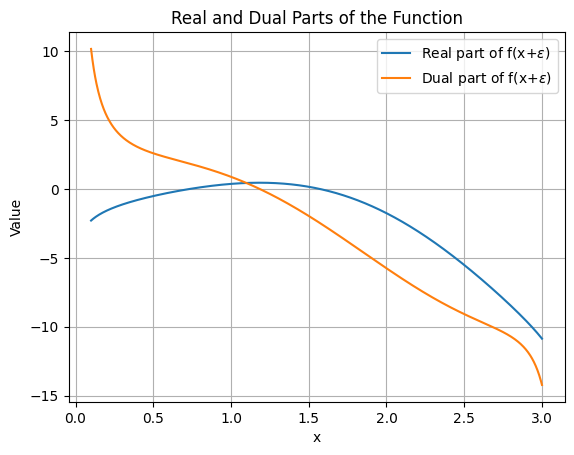

In [6]:
from matplotlib import pyplot as plt 


#bounds of our evaluation 
lower = 0.1
upper = 3
steps = 1000

x_vals = np.linspace(lower, upper,steps)
real_list = []
dual_list = []



for x in x_vals:

    #sets up our dual number for current x and evalutes it at our function
    dual_num = Dual(x,1)
    result = function_dual(dual_num)


    #collects real and dual parts and appends them to our list
    real_part = result.real
    dual_part = result.dual

    real_list.append(real_part)
    dual_list.append(dual_part)



#plotting our result 

plt.plot(x_vals, real_list, label = "Real part of f(x+$\epsilon$)")
plt.plot(x_vals, dual_list, label = "Dual part of f(x+$\epsilon$)")
plt.title("Real and Dual Parts of the Function")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

Now let us consider differentiation of our funtion at 1.5 using the numerical derivitive

A numerical approach to the derivitive of f(x), evaluates the function at f(x) and at f(x+h), where h is a defined step size. The approximation for the derivitive then may be given by  

$$\frac{f(x+h)-f(x)}{h}, $$
this gives an approximation of f'(x).

The true derivitive of f(x) at x should follow 

$$f'(x) =  \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

Thus one would expect as our step size approaches zero the numerical estmition of the derivite should converge to the true value of the derivitive at x. Note however at some point floating point precision will become the limiting factor on either our Dual method or numerical method calculation of the derivitive 

In [7]:
def numerical_derivitive(x, step_size):
    """
    numerically evaluates the derivitive of f(x) = log(sin(x)) + x^2 cos(x) 

    parameters
    -------
    x: int,float
        A number for the derivitive to be evaluated on.
    
    Returns
    -------
    int,float
        The numerical estimate of the derivitive at x.

    """

    func = np.log(np.sin(x)) + x**2 * np.cos(x)
    perturbed_func = np.log(np.sin(x+step_size)) + (x+step_size)**2 * np.cos(x+step_size)

    return (perturbed_func - func)/step_size


I may plot how the numerical derivitive does as a function of step size, as previously mentioned large step sizes should be a poor estimate of the derivitive at the chosen point, but should become more accurate as step size becomes smaller

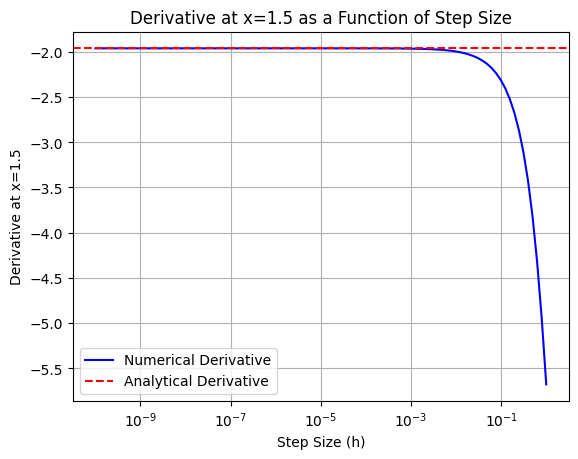

In [8]:
x_value = 1.5

low_power = -10
high_power =0
step_number = 100
steps = np.logspace(low_power,high_power,step_number)
numerical_results = []

for step in steps:
    derivitive_estimate = numerical_derivitive(x_value, step)
    numerical_results.append(derivitive_estimate)


plt.plot(steps, numerical_results, label="Numerical Derivative", color="blue")
plt.axhline(dual_deriv_result.dual, color="red", linestyle="--", label="Analytical Derivative") # plotting the result from dual numbers from ealier
plt.xscale("log")  # Logarithmic scale for step size
plt.xlabel("Step Size (h)")
plt.ylabel("Derivative at x=1.5")
plt.title("Derivative at x=1.5 as a Function of Step Size")
plt.legend()
plt.grid()
plt.show()

From the above one see's one one would expect. At high values of pur step size, we dont have a particularily accuracte estimation of our derivitive, yet as our step size decreases our numerical approximation approaches our analytcial solution. And from $h=10^{-3}$ does a solid estimate. 

Let us analyse this in a few more regions,


1) for very high h

We have seen above that for large h we have a poor estimate for f'(x). we can visualise this even more by expanding our step size further. 

C:\Users\josh1\AppData\Local\Temp\ipykernel_28320\496060224.py:18: RuntimeWarning: invalid value encountered in log
  perturbed_func = np.log(np.sin(x+step_size)) + (x+step_size)**2 * np.cos(x+step_size)


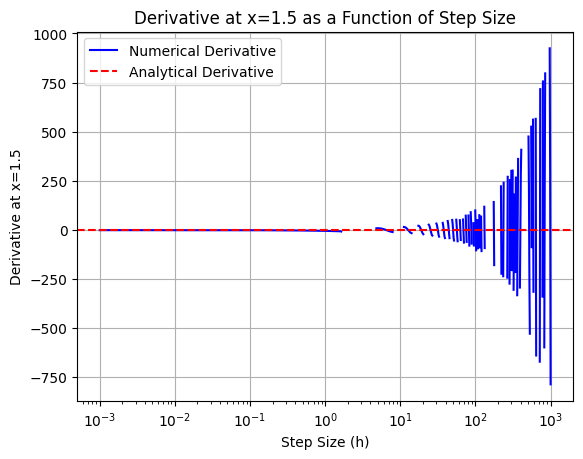

In [11]:
x_value = 1.5

low_power = -3
high_power =3
step_number = 1000
steps = np.logspace(low_power,high_power,step_number)
numerical_results = []

for step in steps:
    derivitive_estimate = numerical_derivitive(x_value, step)
    numerical_results.append(derivitive_estimate)


plt.plot(steps, numerical_results, label="Numerical Derivative", color="blue")
plt.axhline(dual_deriv_result.dual, color="red", linestyle="--", label="Analytical Derivative") # plotting the result from dual numbers from ealier
plt.xscale("log")  # Logarithmic scale for step size
plt.xlabel("Step Size (h)")
plt.ylabel("Derivative at x=1.5")
plt.title("Derivative at x=1.5 as a Function of Step Size")
plt.legend()
plt.grid()
plt.show()

The above graph illustrates 2 points in regard to our numerical approach.

When our step size is on the order of 1 to 100 the numerical method does a poor estimate for the derivitive, this is becuase the numerical approach assumes that the non linear parts of our taylor expansion of our function about x are neglible, when our steps are of the order 100 this does not hold.

The above graph also highlights (a somewhat extreme example), that when approximating the derivitive numerically, we are required to add our step size and evaluate our function at a new point. This means our derivitive estimate depends on evaluating our function at 2 points, once at the point we want the derivitive and some other point a step size away. If our function a step size away is not defined, then we can not calulate a derivitive at this point with the current step size.  We see this behaviour illustrated above where f(x) is only defined when sin(x)>0 due to the function containing a log(sin(x)). Meaning when our step size results in evaluation of the function as undefined points we get "gaps" in the dervitive estimate as functin of step size.


2) Numerical derivitive performance at low h




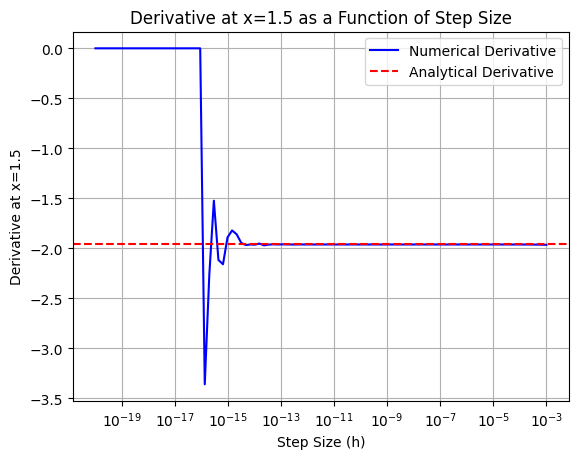

In [21]:
x_value = 1.5

low_power = -20
high_power =-3
step_number = 100
steps = np.logspace(low_power,high_power,step_number)
numerical_results = []

for step in steps:
    derivitive_estimate = numerical_derivitive(x_value, step)
    numerical_results.append(derivitive_estimate)


plt.plot(steps, numerical_results, label="Numerical Derivative", color="blue")
# plotting the result from dual numbers from ealier
plt.axhline(dual_deriv_result.dual, color="red", linestyle="--", label="Analytical Derivative") 
# Logarithmic scale for step size
plt.xscale("log")  
plt.xlabel("Step Size (h)")
plt.ylabel("Derivative at x=1.5")
plt.title("Derivative at x=1.5 as a Function of Step Size")
plt.legend()
plt.grid()
plt.show()

I may also consider the relative error on a logarithmic scale. to visualize this further

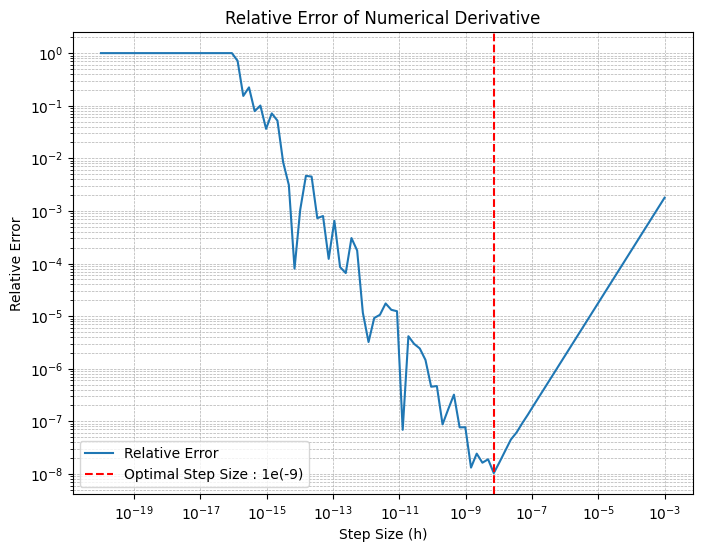

In [ ]:
x_value = 1.5



# same code as above but now calulating the relative error at each step relative to the 
low_power = -20
high_power = -3
step_number = 100
steps = np.logspace(low_power, high_power, step_number)
relative_errors = []



for step in steps:
    derivitive_estimate = numerical_derivitive(x_value, step)

    relative_error = abs(derivitive_estimate - dual_deriv_result.dual) / abs(dual_deriv_result.dual)
    relative_errors.append(relative_error)



# I can also find the optimal step size to balance trunctation of precisoin erro by finding the minimum of this error. Obvioulsy this isnt the exact optimal
# step size as im scanning over a log range. Im not gann explore here as its just for illustrative purposes, but you could do a finer search closer to the minimum

min_rel_error_index = np.argmin(relative_errors)
optimal_step = steps[min_rel_error_index]

# grab the power of the optimal step size
optimal_step_size_order = math.floor(math.log10(abs(optimal_step))) 

plt.figure(figsize=(8, 6))
plt.loglog(steps, relative_errors, label="Relative Error")

''
plt.axvline(optimal_step, color='r', linestyle='--', label=f"Optimal Step Size : 1e({optimal_step_size_order})")
plt.xlabel("Step Size (h)")
plt.ylabel("Relative Error")
plt.title("Relative Error of Numerical Derivative")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()



The above illustrates the balance of truncation erro and precision error.

Truncation error is the error assiciated with the fact that when calculating the numerical derivitive our approximation is that our step size is small, the larger h is the worse this assumption is and we see increasing error in the derivitive. This effect dominates at larger step sizes and we may see it from the above graph seems to begin to be the dominant source of error about a step size of 10^-9. At regions lower than this the dominant source of the error is related to the computational storage of foatong point numbers. Computers have finite memory meaning for floating point digits they may only store them to some finite precision and any components after this are simply rounded off. Thus when we subtract 2 numbers (as is the case in the numerator of the numerical derivitive approximation) that only differ by extremley small amounts (as is the case when step size is extremely small) the inacuraccy imposed by the rounding of our numbers such that they may be represented in floating point begins to dominate, and with smaller step sizes (the denominator is aslo very small) these errors can expload until the point when f(x) and f(x+h) are the same number to flaoting point precision in which case our dervitive goes to 0.

